The adult data set is a famous Data Set from UCI machine learning repository in which we have to predict the income if it will exceed 50k or no.

http://archive.ics.uci.edu/ml/datasets/adult

*In this exercise we will clean the data and then use decision tree algo for predictions. Along the way we will use grid search to reach the optimal settings for decision tree model.*

In [65]:
#making the required imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [66]:
#reading the csv file into a df

df = pd.read_csv('adult_dataset.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [68]:
#checking for missing values
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [69]:
#percentage of missing values is aroung 5%
(1836/len(df['workclass']))*100

5.638647461687294

In [70]:
#getting rid of the missing values
df = df[df['workclass'] != '?']
df.head(20)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K


In [71]:
#there are no missing values now
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [72]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])

# checking whether any other columns contain a "?"
df_categorical.apply(lambda x: x=="?", axis=0).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [73]:
#dropping the question mark values
df = df[df['occupation'] != '?']
df = df[df['native.country'] != '?']

In [74]:

df_categorical = df.select_dtypes(include=['object'])

#to check if we have any question marks now
df_categorical.apply(lambda x: x=="?", axis=0).sum()

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education.num     30162 non-null int64
marital.status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
native.country    30162 non-null object
income            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Prep and label encoding

In [76]:
#import the label encoder
from sklearn.preprocessing import LabelEncoder

In [77]:
#selecting the non-numerical features. so that we can label encode them
df_categorical = df.select_dtypes(include= ['object'])
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [78]:
#label encoding of non-numerical columns
label_encoder = LabelEncoder()
df_categorical = df_categorical.apply(label_encoder.fit_transform)
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [79]:
#dropping the categorical columns from orignal df
df = df.drop(df_categorical.columns, axis = 1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
1,82,132870,9,0,4356,18
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
5,34,216864,9,0,3770,45
6,38,150601,6,0,3770,40


In [80]:
#concatenate with label encoded df
df = pd.concat([df,df_categorical], axis =1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
fnlwgt            30162 non-null int64
education.num     30162 non-null int64
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
workclass         30162 non-null int32
education         30162 non-null int32
marital.status    30162 non-null int32
occupation        30162 non-null int32
relationship      30162 non-null int32
race              30162 non-null int32
sex               30162 non-null int32
native.country    30162 non-null int32
income            30162 non-null int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


## Model building

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
#separating X and y
X = df.drop(['income'], axis =1)

y = df['income']

In [85]:
#train test split with default values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
#importing and training the decision tree model
from sklearn.tree import DecisionTreeClassifier

dt_default = DecisionTreeClassifier(max_depth= 5)

dt_default.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
#getting the predictions
y_pred_default = dt_default.predict(X_test)

In [89]:
#checking for accuracy
from sklearn import metrics

metrics.accuracy_score(y_test,y_pred_default)

0.8392605987542696

In [90]:
metrics.confusion_matrix(y_test,y_pred_default)

array([[7065,  381],
       [1219, 1289]], dtype=int64)

In [91]:
class_rep = metrics.classification_report(y_test,y_pred_default)
print(class_rep)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7446
           1       0.77      0.51      0.62      2508

   micro avg       0.84      0.84      0.84      9954
   macro avg       0.81      0.73      0.76      9954
weighted avg       0.83      0.84      0.83      9954



## Plotting the decision tree

In [92]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df.columns[1:])
features

['fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

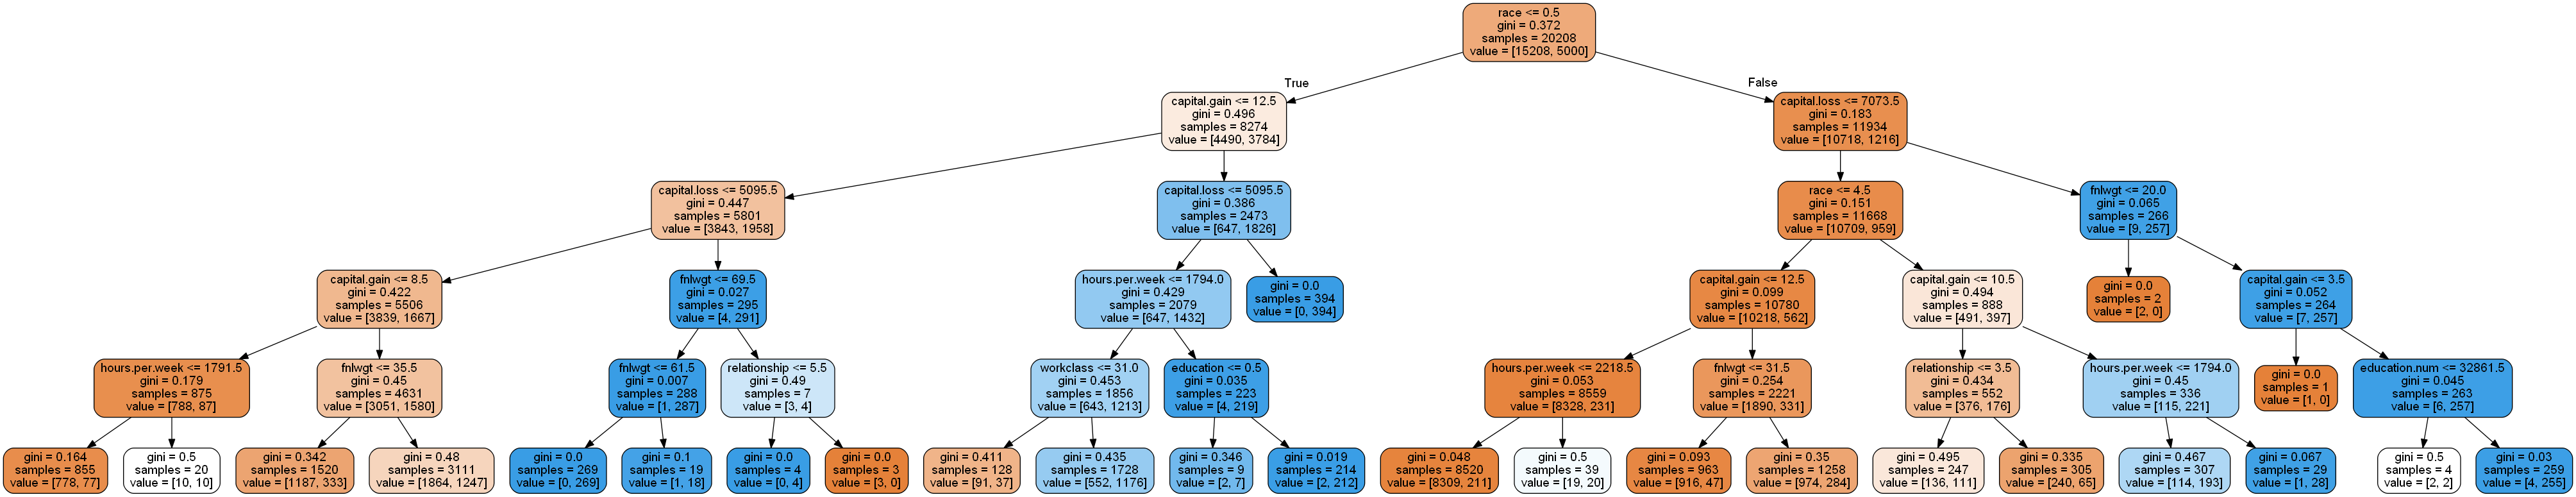

In [95]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### checking accuracy with respect to different depth of tree

In [112]:
accuracy_tree = []

for i in range(1,101,2):
    
    dt = DecisionTreeClassifier(max_depth= i)

    dt.fit(X_train,y_train)
    
    y_pred = dt.predict(X_test)
    
    accu = metrics.accuracy_score(y_test,y_pred)
    
    accuracy_tree.append(accu)


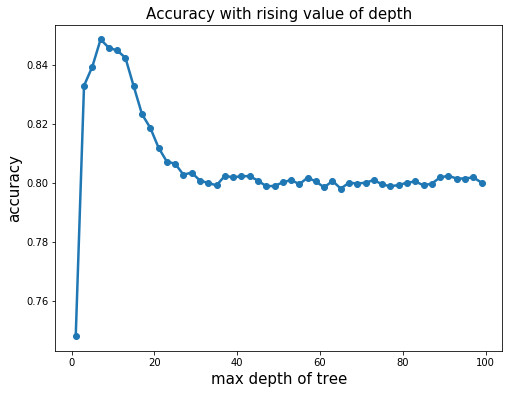

In [118]:
#plotting the accuracy 
plt.figure(figsize= (8,6))
c = [i for i in range(1,101,2)]

plt.plot(c,accuracy_tree, linewidth = 2.5, linestyle = '-',marker = 'o')
plt.xlabel('max depth of tree', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.title('Accuracy with rising value of depth', fontsize = 15)
plt.show()


## As we can see that the max depth 7 is giving the best accuracy

### Making predictions with max depth 7

In [119]:
#setting the maxdepth to 7
final_tree = DecisionTreeClassifier(max_depth= 7)
final_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [120]:
#final predictions
pred_fin = final_tree.predict(X_test)

In [121]:
metrics.confusion_matrix(y_test,pred_fin)

array([[7120,  326],
       [1180, 1328]], dtype=int64)

In [122]:
#classification report
class_rep_fin = metrics.classification_report(y_test,pred_fin)
print(class_rep_fin)

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      7446
           1       0.80      0.53      0.64      2508

   micro avg       0.85      0.85      0.85      9954
   macro avg       0.83      0.74      0.77      9954
weighted avg       0.84      0.85      0.84      9954



In [125]:
#final accuracy of model
round((metrics.accuracy_score(y_test,pred_fin))*100, 4)

84.8704